In [2]:

import warnings                     # For silencing non-critical warnings
import numpy as np                  # library fpr mathematical operatures
import pandas as pd                 # library for dataframes handling
import matplotlib.pyplot as plt     # library for plotting charts
import statsmodels.api as sm        #library for handling time series data
from statsmodels.tsa.seasonal import STL                      #Specific module for seasonal decomposition (trend/seasonal/residual)
from statsmodels.tsa.stattools import adfuller, kpss # Specific module for stationarity tests (ADF/KPSS)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures #feature preprocessing

from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, cross_val_score #For basic ML tasks
from sklearn.preprocessing import StandardScaler                # For feature scaling
from sklearn.feature_selection import SelectKBest, f_regression # For feature selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # For using regression metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # For using tree ensembles
from sklearn.linear_model import Ridge, LinearRegression                          # ML regression models

# Optional console tweaks
warnings.filterwarnings("ignore")       # hide unimportant warnings
pd.set_option("display.max_rows", None) # show full DataFrame rows when printing

In [3]:
!pip install download

In [4]:

from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [5]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [6]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')



In [ ]:
import pandas as pd
from google.colab import files

path = '/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')  # read everything

out_path = 'dingling_clean.csv'
df.to_csv(out_path, index=False, encoding='utf-8-sig')  # keep all columns
files.download(out_path)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:

def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [10]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)


In [ ]:

aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [8]:
df = df.ffill()

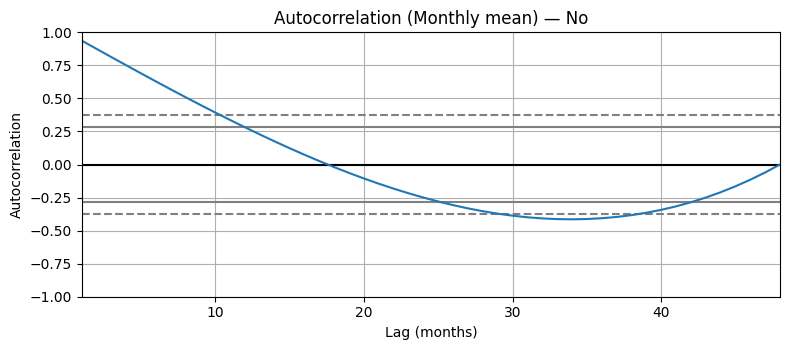

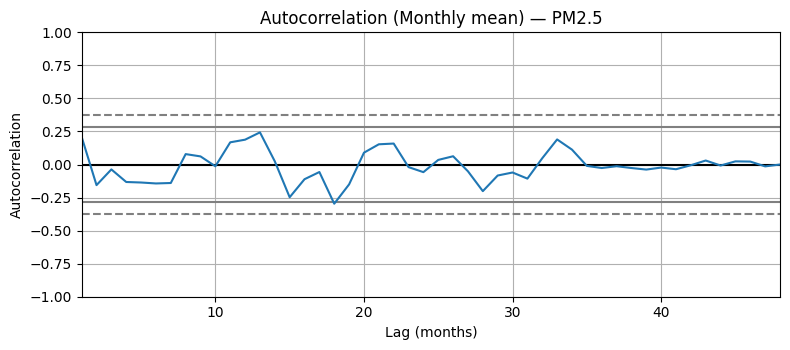

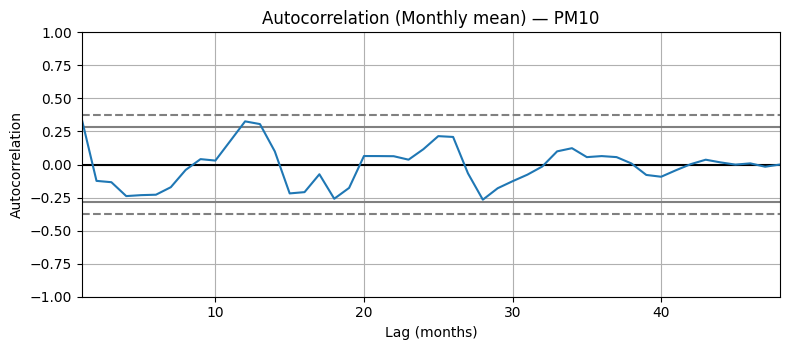

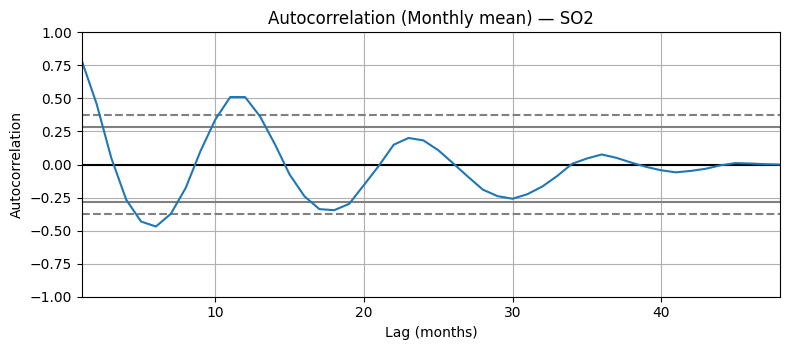

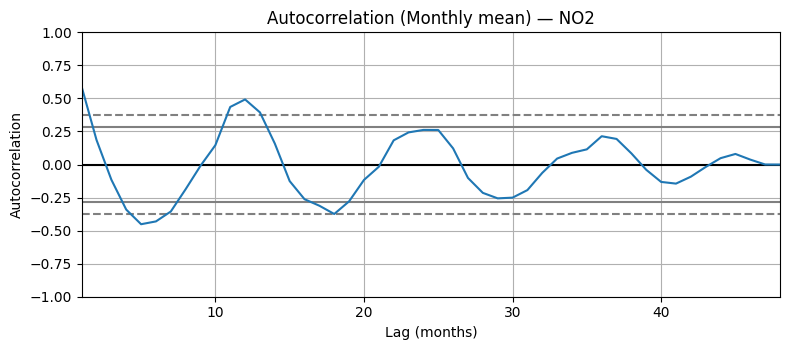

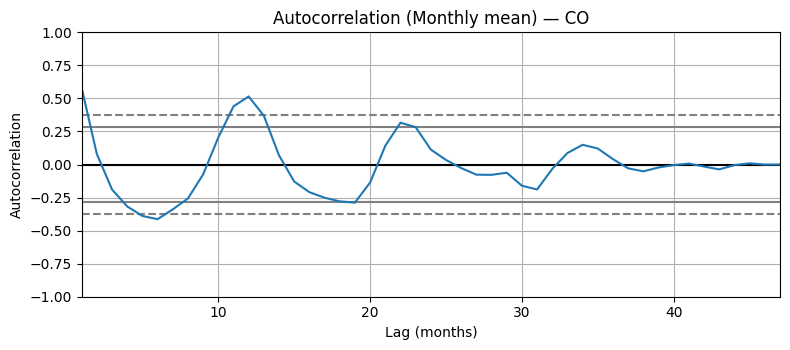

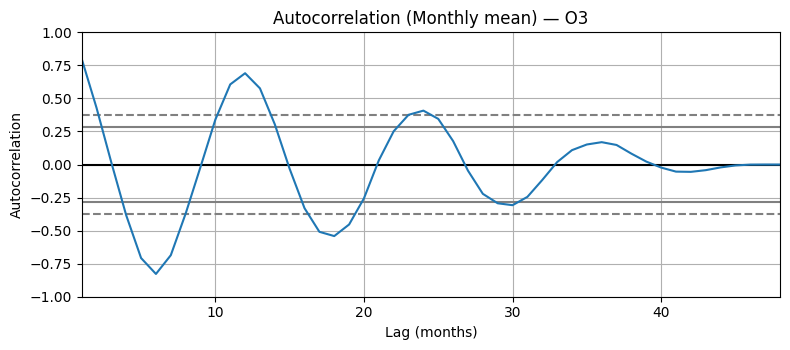

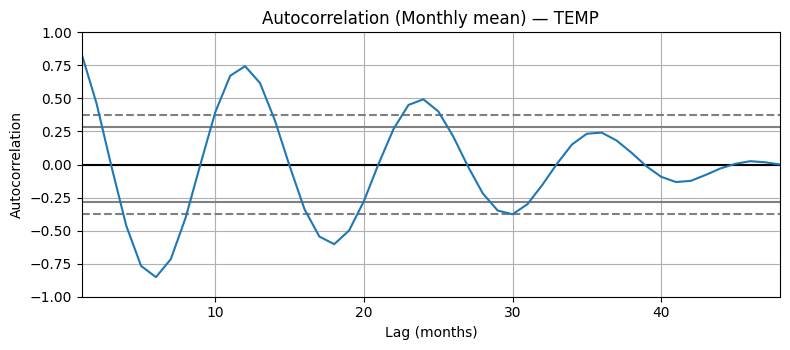

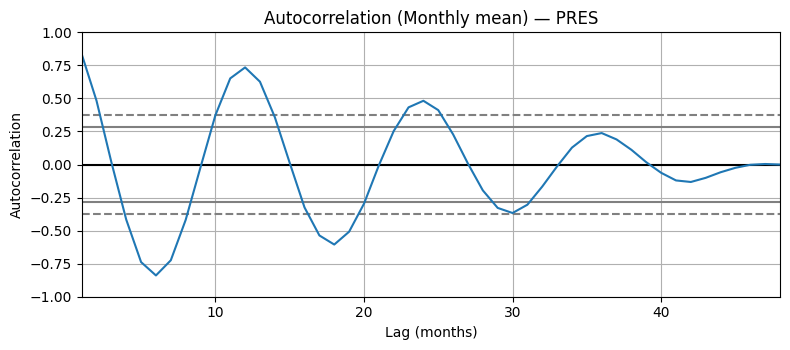

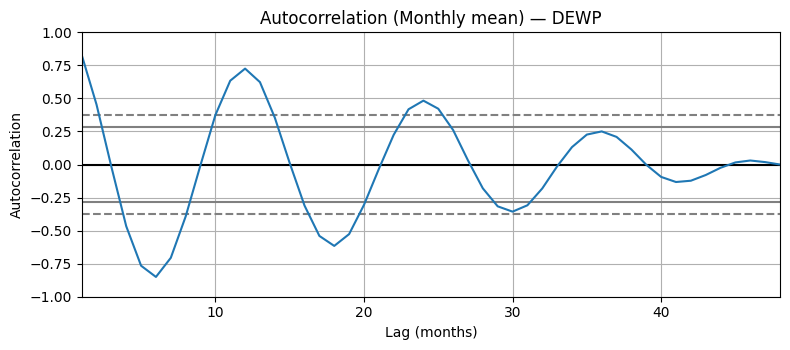

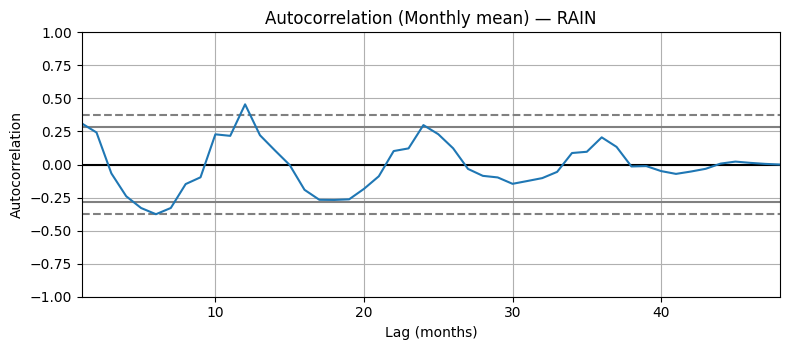

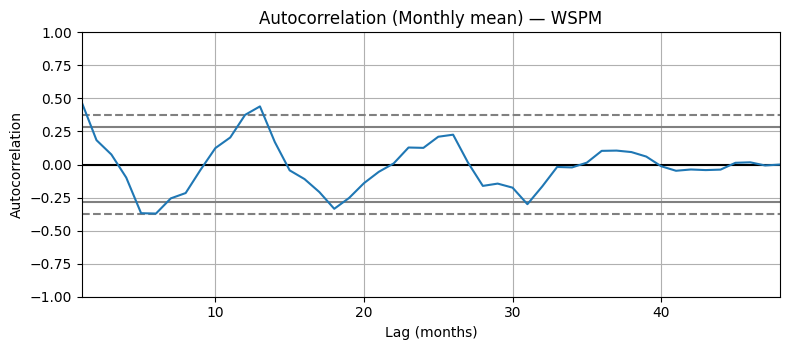

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

# --- Ensure a DatetimeIndex (adjust the column name if yours differs) ---
TIME_COL = "year_month_day_hour"  # <-- change if needed
aq_df = aq_df.copy()
if TIME_COL in aq_df.columns:
    aq_df[TIME_COL] = pd.to_datetime(aq_df[TIME_COL], errors="coerce")
    aq_df = aq_df.dropna(subset=[TIME_COL]).set_index(TIME_COL).sort_index()
# If it's already a DatetimeIndex, this does nothing.

# --- Monthly resample: use "1M" (month-end). For month-start use "MS". ---
aq_m = aq_df.resample("1M").mean(numeric_only=True)

# --- Plot autocorrelation for EVERY numeric column ---
for col in aq_m.columns:
    if not is_numeric_dtype(aq_m[col]):
        continue
    s = aq_m[col].dropna()
    if len(s) < 3:
        continue

    plt.figure(figsize=(8, 3.6))
    pd.plotting.autocorrelation_plot(s)
    plt.title(f"Autocorrelation (Monthly mean) — {col}", fontsize=12)
    plt.xlabel("Lag (months)")      # lags correspond to months after monthly resample
    plt.ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()


In [11]:
aq_df = aq_df.ffill()
df = aq_df

In [12]:
df_diff = df["PM2.5"].ffill()

#Autoregressive

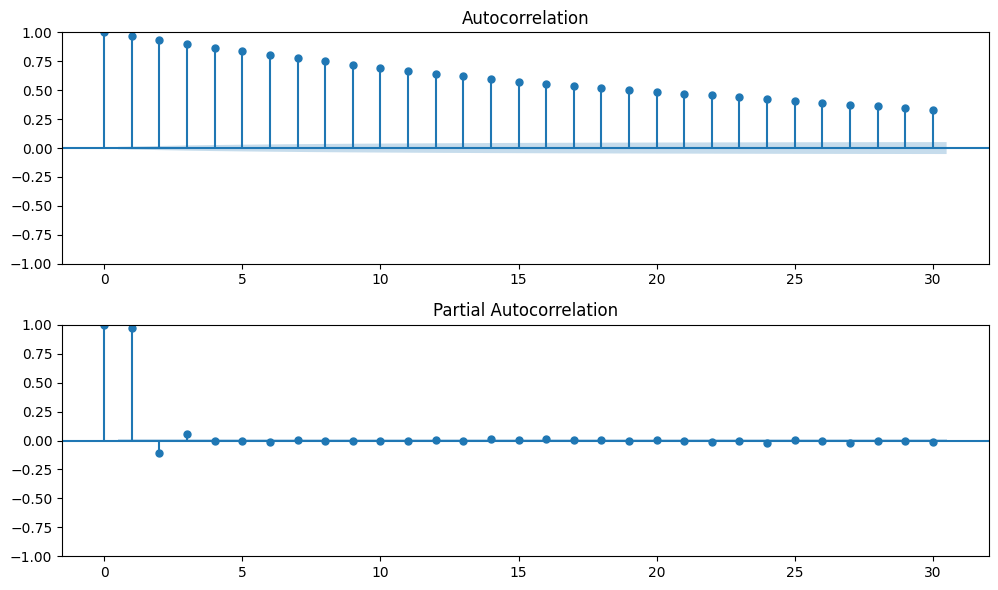

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(df_diff, lags=30, ax=ax[0])
plot_pacf(df_diff, lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

In [12]:
n = len(df_diff)
train_end = int(n * 0.8)
train = df_diff.iloc[:train_end]
test = df_diff.iloc[train_end:]

In [15]:
from statsmodels.tsa.ar_model import AutoReg
p = 13
model = AutoReg(train, lags=p, old_names=False)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                    AutoReg(13)   Log Likelihood             -122147.395
Method:               Conditional MLE   S.D. of innovations             18.870
Date:                Fri, 31 Oct 2025   AIC                         244324.791
Time:                        07:58:38   BIC                         244448.410
Sample:                            13   HQIC                        244364.583
                                28051                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3781      0.160     14.887      0.000       2.065       2.691
PM2.5.L1       1.0675      0.006    178.750      0.000       1.056       1.079
PM2.5.L2      -0.1669      0.009    -19.101      0.0

In [16]:
pred_train = model_fit.predict(start=train.index[p], end=train.index[-1], dynamic=False)
pred_test = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

In [17]:
rmse = np.sqrt(mean_squared_error(test, pred_test))
mae = mean_absolute_error(test, pred_test)
print(rmse, mae,sep="\n")

74.58270775412082
53.49654190714791


In [14]:
# --- Minimal ARIMA for PM2.5 (non-seasonal, no exog) ---
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ---- 1) Prepare the series ----
df = aq_df.copy()

time_col  = 'year_month_day_hour'   # adjust if different
value_col = 'PM2.5'                 # adjust if different

s = (df.assign(**{time_col: pd.to_datetime(df[time_col])})
       .set_index(time_col)
       .sort_index()[value_col]
       .astype(float)
       .asfreq('H')              # hourly data
       .interpolate('time'))     # fill small gaps smoothly

# ---- 2) Train/test split ----
n_test = max(24, int(0.2*len(s)))
train, test = s.iloc[:-n_test], s.iloc[-n_test:]

# ---- 3) Pick ARIMA order ----
# Option A (fixed): choose something sensible to start
order = (1, 1, 1)

print("Using ARIMA order:", order)

# ---- 4) Fit ARIMA ----
model = ARIMA(train, order=order,
              enforce_stationarity=False,
              enforce_invertibility=False)
res = model.fit()
print(res.summary())  # Header says SARIMAX; that's normal (ARIMA is a special case)

# ---- 5) Forecast ----
pred = res.forecast(steps=len(test))
pred.index = test.index  # align to timestamps

# ---- 6) Metrics ----
mae  = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f}")



Using ARIMA order: (1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                28052
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -122473.750
Date:                Fri, 31 Oct 2025   AIC                         244953.499
Time:                        08:20:18   BIC                         244978.224
Sample:                    03-01-2013   HQIC                        244961.458
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4307      0.012    -36.748      0.000      -0.454      -0.408
ma.L1          0.5250      0.011     47.362      0.000       0.503       0.547
sigma2       363.1940  

In [ ]:
# --- SARIMA for PM2.5 (simple & robust) ---
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = aq_df

# 1) prepare series (edit col names)
time_col  = 'year_month_day_hour'
value_col = 'PM2.5'

s = (df.assign(**{time_col: pd.to_datetime(df[time_col])})
       .set_index(time_col)
       .sort_index()[value_col]
       .astype(float))

# assume hourly data; change to 'D' for daily
s = s.asfreq('H').interpolate('time')

# 2) split train/test
n_test = max(int(0.2*len(s)), 24)
train, test = s.iloc[:-n_test], s.iloc[-n_test:]

p,d,q   = 1,1,1
P,D,Q,m = 1,1,1,24

model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,m),
                enforce_stationarity=False, enforce_invertibility=False)
fit = model.fit(disp=False)
print(fit.summary())

# 4) forecast exactly the test length (avoids off-by-one)
pred_test = fit.forecast(steps=len(test))
pred_test.index = test.index

# 5) quick metrics + plot

mae  = mean_absolute_error(test, pred_test)
print(f"RMSE: {rmse:.3f} | MAE: {mae:.3f}")



# 6) (optional) refit on all data and forecast h steps ahead
h = 48  # change as you like
final = SARIMAX(s, order=(p,d,q), seasonal_order=(P,D,Q,m),
                enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
future = final.forecast(steps=h)
print(future.head())



                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                28052
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -122271.537
Date:                            Fri, 31 Oct 2025   AIC                         244553.074
Time:                                    08:27:14   BIC                         244594.274
Sample:                                03-01-2013   HQIC                        244566.337
                                     - 05-12-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4502      0.013    -35.484      0.000      -0.475      -0.425
ma.L1          0.5408      0.012   